In [17]:
# %%
import torch
import os
import PIL.Image
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from datasets import load_dataset
from models.cifnet import CifNetForImageClassification, CifNetConfig

# %%
# Function to set up the model
def setup_model(model_name_or_path):
    model_config = CifNetConfig.from_pretrained(model_name_or_path)
    model = CifNetForImageClassification.from_pretrained(model_name_or_path, config=model_config)
    return model

In [18]:
# list all models
models = os.listdir('OUTPUTS')
for i, model in enumerate(models):
    print(f'{i}: {model}')

0: cifnet-18-tiny-lr0.01-bottleneck
1: cifnet-18-apple--lr0.001--tbtest
2: cifnet-18-tiny-lr0.01-attention
3: cifnet-18-tiny_attention--lr0.001--prenorm
4: cifnet-18-banana--lr0.001--sigmoid_4d_128-128-64-64
5: cifnet-18-durian--lr0.001--d4_256
6: cifnet-18-cucumber--lr0.001--d4_256
7: cifnet-18-tiny-lr0.1-baseline


In [19]:
# Choose model
model_num = 5

# Load and set up model
model_path = os.path.join('OUTPUTS', models[model_num])
model = setup_model(model_path).to('cuda')

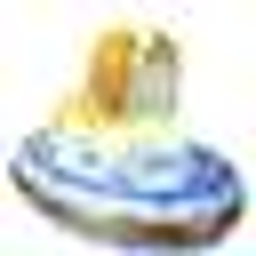

In [20]:
# Show demo.jpg
img = PIL.Image.open('demo.jpg')
# Resized for human eyes
img.resize((256, 256))

In [21]:
id2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [22]:
# %%
# Define transformations based on your model's requirements
transforms = Compose([
    Resize((256, 256)),  # Resize to the input size of the model
    CenterCrop(224),     # Crop to the model's expected input dimensions
    ToTensor(),          # Convert image to tensor
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (example values)
])

# Load the image
image_path = 'demo.jpg'  # Path to your image
image = PIL.Image.open(image_path).convert('RGB')
image = transforms(image).unsqueeze(0).to('cuda')  # Add batch dimension and transfer to GPU

# %%
# Model prediction
model.eval()
with torch.no_grad():
    outputs = model(image)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

# Print predicted label
print(f'Predicted label: {id2label[predicted_labels.item()]}')


Predicted label: ship
